# vta - Mini Challenge - Gradient Descent 

Das Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis für numerische
Näherungsverfahren in höheren Dimensionen erlangen, insbesondere für den Gradient Descent
und dessen praktische Anwendung. Hierfür sollen Sie ein Jupyter Notebook erstellen und das
MNIST Dataset laden und erkunden. Anschließend sollen Sie ein neuronales Netzwerk erstellen
und trainieren, um die Bilder korrekt zu klassifizieren. Es dürfen nur die angegebenen Python
packages verwendet werden.  
Ziel dieser Aufgabe ist nicht nur, Ihre mathematischen Kenntnisse unter Beweis zu stellen, sondern
auch die entsprechende Kommunikation und Präsentation Ihrer Ergebnisse. Ihre Abgaben sollen
also nicht nur mathematisch korrekt, sondern auch leicht verständlich und reproduzierbar
sein. Genauere Angaben zu den Erwartungen an die Abgabe finden Sie in den Auswertungskriterien.
Dokumentieren Sie ihren Arbeitsfortschritt und Erkenntnisgewinn in Form eines Lerntagebuchs,
um Lernfortschritte, Schwierigkeiten und Erkenntnisse festzuhalten.
Die folgenden Aufgabenstellungen präzisieren die einzelnen Bearbeitungsschritte und geben die
Struktur des Notebooks vor.

Diese Challenge wurde im FS23 erarbeitet von:  
Patrik Schürmann   
Tobias Buess  
Si Ben Tran   

---

# Aufgabe 1 
Laden Sie das MNIST-Dataset mithilfe des torchvision-Pakets (Verwenden Sie das torchvision
Paket für diese Aufgabe) und verwenden Sie matplotlib, um sich einen Überblick über die Daten
zu verschaffen. Beschreiben Sie das grundlegenden Eigenschaften des Datensets, z.B. wie viele
und welche Daten es enthält.

**Dataset**
1) Sind Trainings und Testdaten des MNIST-Dataset korrekt mithilfe des torchvision-Pakets
geladen worden?
2) Die grundlegenden Eigenschaften des MNIST-Datasets werden richtig beschrieben.
3) Die Visualisierungen der Daten sind gut verständlich und representativ.

In [1]:
# Libraries Laden 
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [2]:
# 1. Trainings und Testdaten des MNIST-Dataset mithilfe torchvision laden

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

7.6%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%
77.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%
100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# 2. Eigenschaften des MNIST-Datasets beschreiben

# Ausgabe der Trainings- und Testdaten shape
print("Train Dataset Shape: ", train_dataset.data.shape)
print("Validation Dataset Shape: ", test_dataset.data.shape)

# Ausgabe der Anzahl der Trainings- und Testbilder
print(f"Anzahl der Trainingsbilder: {len(train_dataset.data)}")
print(f"Anzahl der Testbilder: {len(test_dataset.data)}")

# Dimension der Trainings- und Testbilder
print(f"Bildauflösung der Trainingsbilder: {train_dataset.data[0].shape}")
print(f"Bildauflösung der Testbilder: {test_dataset.data[0].shape}")

Train Dataset Shape:  torch.Size([60000, 28, 28])
Validation Dataset Shape:  torch.Size([10000, 28, 28])
Anzahl der Trainingsbilder: 60000
Anzahl der Testbilder: 10000
Bildauflösung der Trainingsbilder: torch.Size([28, 28])
Bildauflösung der Testbilder: torch.Size([28, 28])


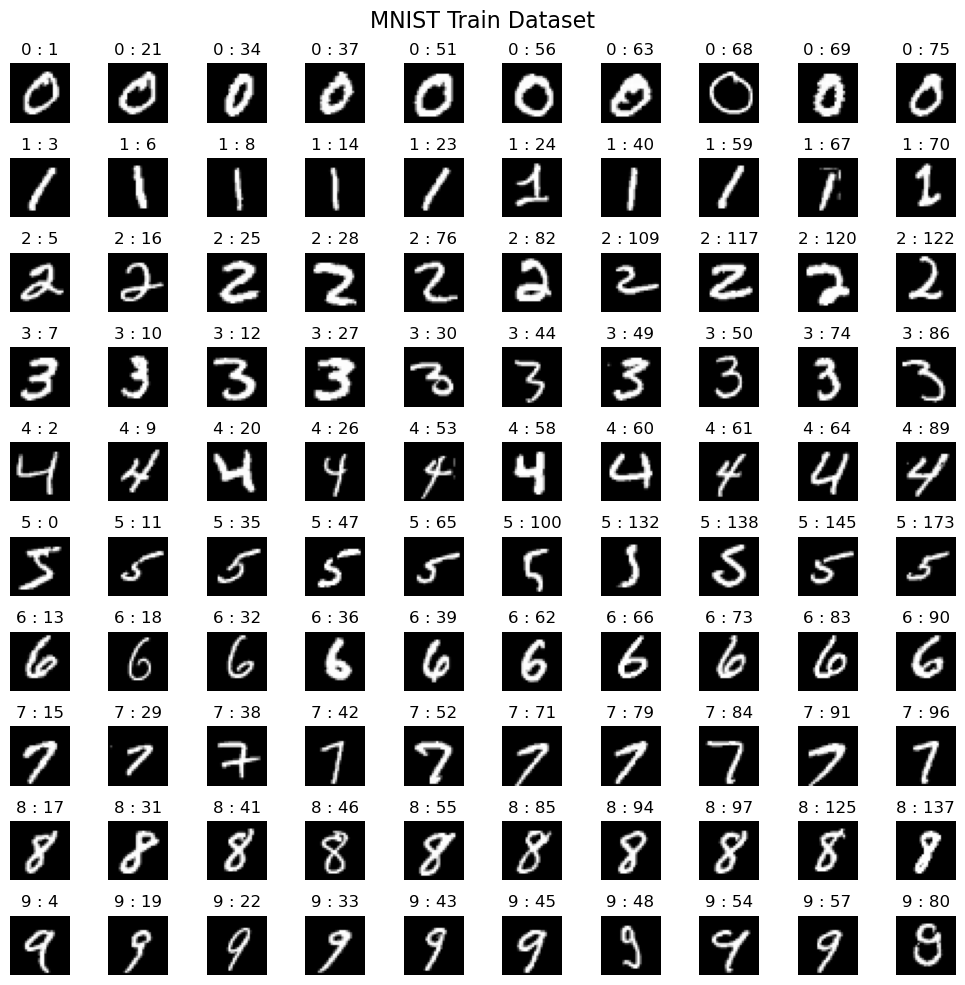

In [4]:
# 3. Visualisierung der Daten 

# Ausgabe der Bilder des MNIST-Datasets
def visualize_mnist_grid(dataset = train_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(10, 10, figsize=(10, 10))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(10):
        for j in range(10):
            # Finden des nächsten Bildes mit der Klasse i
            idx = np.where(dataset.targets == i)[0][j]
            # Laden des Bildes
            img = dataset.data[idx]
            # Anzeigen des Bildes
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].set_title(f"{i} : {idx}")
            axs[i, j].axis('off')
            fig.suptitle(title, fontsize=16)

    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_grid(train_dataset, "MNIST Train Dataset")

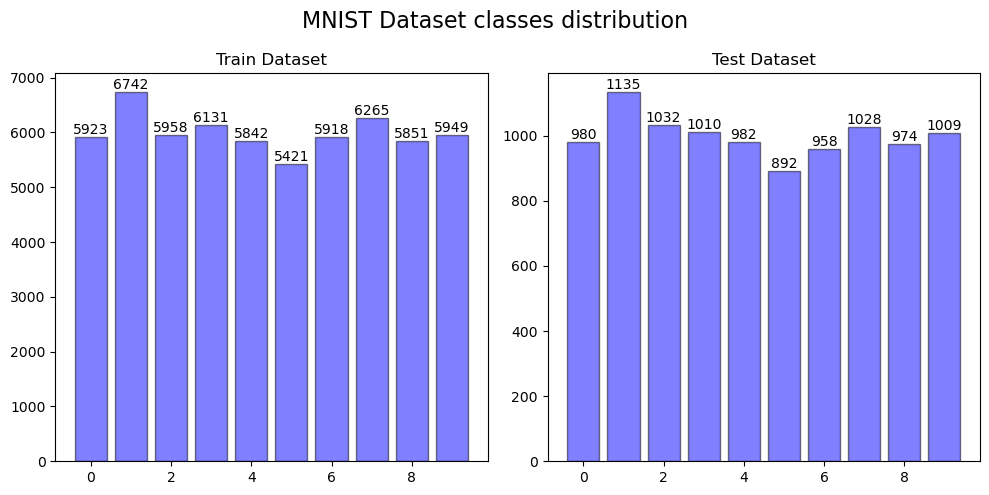

In [5]:
# visualize distritbution of classes with bar chart for train and test dataset
def visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(2):
        if i == 0:
            axs[i].bar(np.unique(dataset_train.targets), np.unique(dataset_train.targets, return_counts=True)[1], color='blue', alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Train Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_train.targets))):
                axs[i].text(j, np.unique(dataset_train.targets, return_counts=True)[1][j], np.unique(dataset_train.targets, return_counts=True)[1][j], ha='center', va='bottom')
        else:
            axs[i].bar(np.unique(dataset_test.targets), np.unique(dataset_test.targets, return_counts=True)[1], color = "blue", alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Test Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_test.targets))):
                axs[i].text(j, np.unique(dataset_test.targets, return_counts=True)[1][j], np.unique(dataset_test.targets, return_counts=True)[1][j], ha='center', va='bottom')
    
    fig.suptitle(title, fontsize=16)
    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = "MNIST Dataset classes distribution")


---

# Aufgabe 2
Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie die
Methoden forward, backward und update mithilfe von numpy. Schreiben sie geeignete Unittests,
um die Funktionsweise der Funktion zu prüfen.

**Linear Layer**

4) Die Klasse für ein lineares Layer wurde mit beliebig vielen Knoten korrekt implementiert.
5) Es wurden geeignete Unittests geschrieben, um die Funktionsweise der Klasse zu prüfen.
(Richtige Berechnung des Gradienten bei mind. zwei Datenpunkten)

In [6]:
class LinearLayerSigmoid:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
        self.bias = np.zeros((1, output_dim))
        self.x = None
        self.dw = None
        self.db = None

    @staticmethod
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))

    @staticmethod
    def sigmoid_deriv(x):
        return LinearLayerSigmoid.sigmoid(x) * (1.0 - LinearLayerSigmoid.sigmoid(x))

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.weights) + self.bias
        out = self.sigmoid(out)
        return out

    def backward(self, dout):
        dout = dout * self.sigmoid_deriv(self.x)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0, keepdims=True)
        dx = np.dot(dout, self.weights.T)
        return dx

    def update(self, lr):
        self.weights -= lr * self.dw
        self.bias -= lr * self.db


In [21]:
linear_layer = LinearLayerSigmoid(input_dim=3, output_dim=1)

def cross_entropy_loss(y_pred, y_true):
    """Cross-entropy loss function."""
    # Clip predicted values to avoid numerical instability
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Calculate cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=-1)
    return loss


def binary_cross_entropy(y_pred, y_true):
    # Calculate the binary cross-entropy loss
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_pred, y_true):
    # Calculate the derivative of the binary cross-entropy loss with respect to y
    return (y_pred - y_true) / (y_pred * (1 - y_pred))


X = np.array([
    [0.05, 0.1, 0.42]
])

y = np.array([
    [1]
])



for i in range(2):
    y_pred = linear_layer.forward(X)
    print(y_pred)
    dout = binary_cross_entropy_derivative(y_pred, y)
    loss = binary_cross_entropy(y_pred, y)
    # print(loss)
    linear_layer.backward(dout)

[[0.61936343]]


ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [7]:
X = np.array([
    [0.05, 0.1, 0.42]
])


linear_layer = LinearLayerSigmoid(input_dim=3, output_dim=3)
linear_layer.forward(X)

array([[0.431825  , 0.64573117, 0.49957234]])

In [9]:
linear_layer.weights

array([[ 0.38021632,  1.11920621,  0.66177714],
       [-0.26673567,  0.05220975, -0.03123285],
       [-0.63511025,  1.28368079, -0.07541959]])

In [10]:
# calculate backpropagation
dout = np.array([
    [0.1, 0.2, 0.3]
])
linear_layer.backward(dout)


array([[ 0.11282735, -0.00630238,  0.04274184]])

In [11]:
linear_layer.db

array([[0.02498438, 0.04987521, 0.07178737]])

In [33]:
# Hard codiert
w = np.array([[0.2, 0.1],[0.3, 0.8]])
b = np.array([[1],[1]])

x = np.array([[0.5, 0.37]]) # 1 observation, 2 features

# create design weight matrix 
W = np.hstack((b, w)).T
W

# display W matrix and its shape
print(W)
print(W.shape)

# display x matrix and its shape
print(x)
print(x.shape)

# calcualte the input of the first layer
z1 = W @ x.T

# display z1 matrix and its shape
print(z1)
print(z1.shape)

[[1.  1. ]
 [0.2 0.3]
 [0.1 0.8]]
(3, 2)
[[0.5  0.37]]
(1, 2)
[[0.87 ]
 [0.211]
 [0.346]]
(3, 1)


---

# Aufgabe 3
Erstellen Sie ein neuronales Netzwerk in numpy mit einem Hidden Linear Layer und einem Output
Knoten. Trainieren Sie das Netzwerk darauf, die Ziffer 4 korrekt zu identifizieren (d.h. der Output
soll 1 für diese Ziffer und 0 für alle anderen Ziffern sein). Trainieren Sie das Netzwerk auf den
Trainingsdaten und evaluieren Sie es anhand von Testdaten. Verwenden Sie eine geeignete Loss-
Funktion sowie Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen
Sie Ihre Wahl mit einer Abwägung der Vor- und Nachteile. Diskutieren Sie kurz weitere Optionen
für Loss und Accuracy.

**Single Layer Model**

6) Das neuronale Netzwerk wurde mit einem Hidden Layer beliebiger Grösse und einem Output
Knoten korrekt implementiert.
7) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
8) Die Wahl wurde begründet und mit anderen mögliche Funktionen verglichen?
9) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex)?
10) Die geeignete Loss-Funktion und Accuracy-Funktion wurde korrekt implementiert.

In [8]:
# CODE

---

# Aufgabe 4
Trainieren Sie das Netzwerk mit verschiedenen Lernraten und Größen des Hidden Layers. Verfolgen
Sie während des Trainings die Entwicklung der Loss- und Accuracy-Funktionen auf Trainingsund
Testdatensätzen und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Größe die
besten Ergebnisse in geringster Zeit liefert.

**Single Layer Model: Training**

11) Das Netzwerk wurde korrekt auf den Trainingsdaten trainiert.
12) Das Netzwerk wurde korrekt auf den Testdaten evaluiert.
13) Es wurden verschiedene Lernraten und Größen des Hidden Layers sinnvoll ausprobiert.
14) Die Entwicklung der Loss- und Accuracy-Funktionen wurden auf Trainings- und Testdatensätzen
korrekt verfolgt und leicht nachvollziehbar dargestellt?
1
15) Die Wahl von Lernrate und Hidden Layer-Größe wurde nachvollziehbar entschieden und
begründet.

In [9]:
# CODE

---

# Aufgabe 5
Erweitern Sie das Netzwerk auf 3 Hidden Layer mit gleicher Größe und 10 Outputs. Das Ziel
ist die korrekte Klassifizierung aller Ziffern. Verwenden Sie eine geeignete Loss-Funktion sowie
Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl
und diskutieren Sie kurz weitere Möglichkeiten. Variieren Sie die Lernrate und die Größe der
Hidden Layer und wählen Sie das beste Ergebnis aus.

**Multi Layer Model**

16) Das Netzwerk wurde auf 3 Hidden Layer mit gleicher, frei wählbarer Größe und 10 Outputs
erweitert.
17) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
18) Die Wahl wurde begründet und mit anderen möglichen Funktionen verglichen.
19) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex).
20) Die geeigneten Loss- und Accuracy-Funktionen wurden korrekt implementiert.
21) Es wurden verschiedene Lernraten und Größen der Hidden Layer sinnvoll ausprobiert.
22) Die Entwicklung der Loss- und Accuracy-Funktionen auf Trainings- und Testdatensätzen
wurde korrekt verfolgt und leicht nachvollziehbar dargestellt?
23) Die Wahl der Hyperparameter wurde nachvollziehbar entschieden und begründet?

In [10]:
# CODE

---

# ChatGPT & Form
Für diese Aufgaben kann ChatGPT als Ressource genutzt werden, um Fragen zu stellen oder bei
Problemen Unterstützung zu erhalten. Vorraussetzung ist, dass Sie transparent kommunizieren,
wo und wie Sie ChatGPT eingesetzt haben und welche Verbesserungen nötig waren. Sie können
ChatGPT wie folgt nutzen:

• Stellen Sie Ihre Fragen klar und präzise.  
• Formulieren Sie Ihre Fragen so, dass sie spezifisch auf Ihre Probleme abgestimmt sind.  
• Seien Sie geduldig und geben Sie ChatGPT genügend Zeit, um eine sinnvolle Antwort zu
generieren.  
• Verwenden Sie die Antworten von ChatGPT als eine Art von Hilfestellung und überprüfen
Sie diese stets auf ihre Richtigkeit.

Wenn Sie eine Frage stellen, die auf eine bestimmte Stelle in Ihrem Code Bezug nimmt, können
Sie den Code zusammen mit Ihrer Frage bereitstellen.

**Form**

24) Das Notebook lässt sich komplett und fehlerfrei ausführen.
25) Es werden nur die Angegebenen Pakete verwendet: numpy, matplotlib; torchvision nur für
das Dataset.
26) Die Ergebnisse werden gut verständlich kommuniziert und kritisch evaluiert.
27) Die Grafiken sind vollständig beschriftet und ohne weiter Erläuterung verständlich.
28) Der Code ist gut strukturiert und verständlich kommentiert.
29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung
eigenständig verständlich ist.
30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und
macht mit den Kommentaren deutlich, wie und wofür ChatGPT und andere Tools verwendet
wurden.